# Test
# (Q1 to Q10 -4 Marks each, Q11 & Q12-10 Marks, Q13 - 20 Marks)

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot  as plt
fifa_matches_df=pd.read_csv('matches.csv')
covid_df=pd.read_csv('MentalHealthinPregnancyDuringCovid.csv')


In [152]:
# fifa_matches_df
fifa_matches_df.head(1)

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,yellow_card_count,home_yellow_card_count,away_yellow_card_count,yellow_count
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...,523,5,3,8


In [7]:
# covid_df
covid_df.head(5)

,OSF_ID,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date(converted to month and year),Birth_Length,Birth_Weight,Delivery_Mode,NICU_Stay,Language,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm
0,1,38.3,"$200,000+",Masters degree,9.0,13.0,39.71,Dec2020,49.20,3431.0,Vaginally,No,English,2.0,3.0,27.0
1,2,34.6,"$200,000+",Undergraduate degree,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,English,2.0,33.0,92.0
2,3,34.3,"$100,000 -$124,999",Undergraduate degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,French,NaN,NaN,NaN
3,4,28.8,"$100,000 -$124,999",Masters degree,9.0,20.0,38.57,Dec2020,41.00,2534.0,Vaginally,No,French,53.0,67.0,54.0
4,5,36.5,"$40,000-$69,999",Undergraduate degree,14.0,20.0,39.86,Oct2020,53.34,3714.0,Caesarean-section (c-section),No,English,23.0,32.0,71.0


### 1. Bar Plot: Show the total number of goals scored by each team (home and away
### combined). (fifa_matches dataset)

In [10]:
pivot_df_home_team=fifa_matches_df.pivot_table(index='home_team',values="home_score",aggfunc="sum")
pivot_df_home_team

,home_score
home_team,
Algeria,5
Angola,0
Argentina,121
Australia,8
Austria,24
...,...
Uruguay,68
Wales,2
West Germany,77


In [12]:
pivot_df_away_team=fifa_matches_df.pivot_table(index='away_team',values="away_score",aggfunc="sum")
pivot_df_away_team

,away_score
away_team,
Algeria,8
Angola,1
Argentina,31
Australia,9
Austria,19
...,...
Uruguay,21
Wales,3
West Germany,29


In [31]:
combined_df_score=pd.DataFrame({"team":pivot_df_away_team.index,"combined_score":pivot_df_away_team['away_score']+pivot_df_home_team['home_score']})
new_combined_df_score=combined_df_score.reset_index(drop=True) 
new_combined_df_score['combined_score'].fillna(0,inplace=True)
new_combined_df_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   team            86 non-null     object 
 1   combined_score  86 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


/tmp/ipykernel_35219/1873145327.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_combined_df_score['combined_score'].fillna(0,inplace=True)


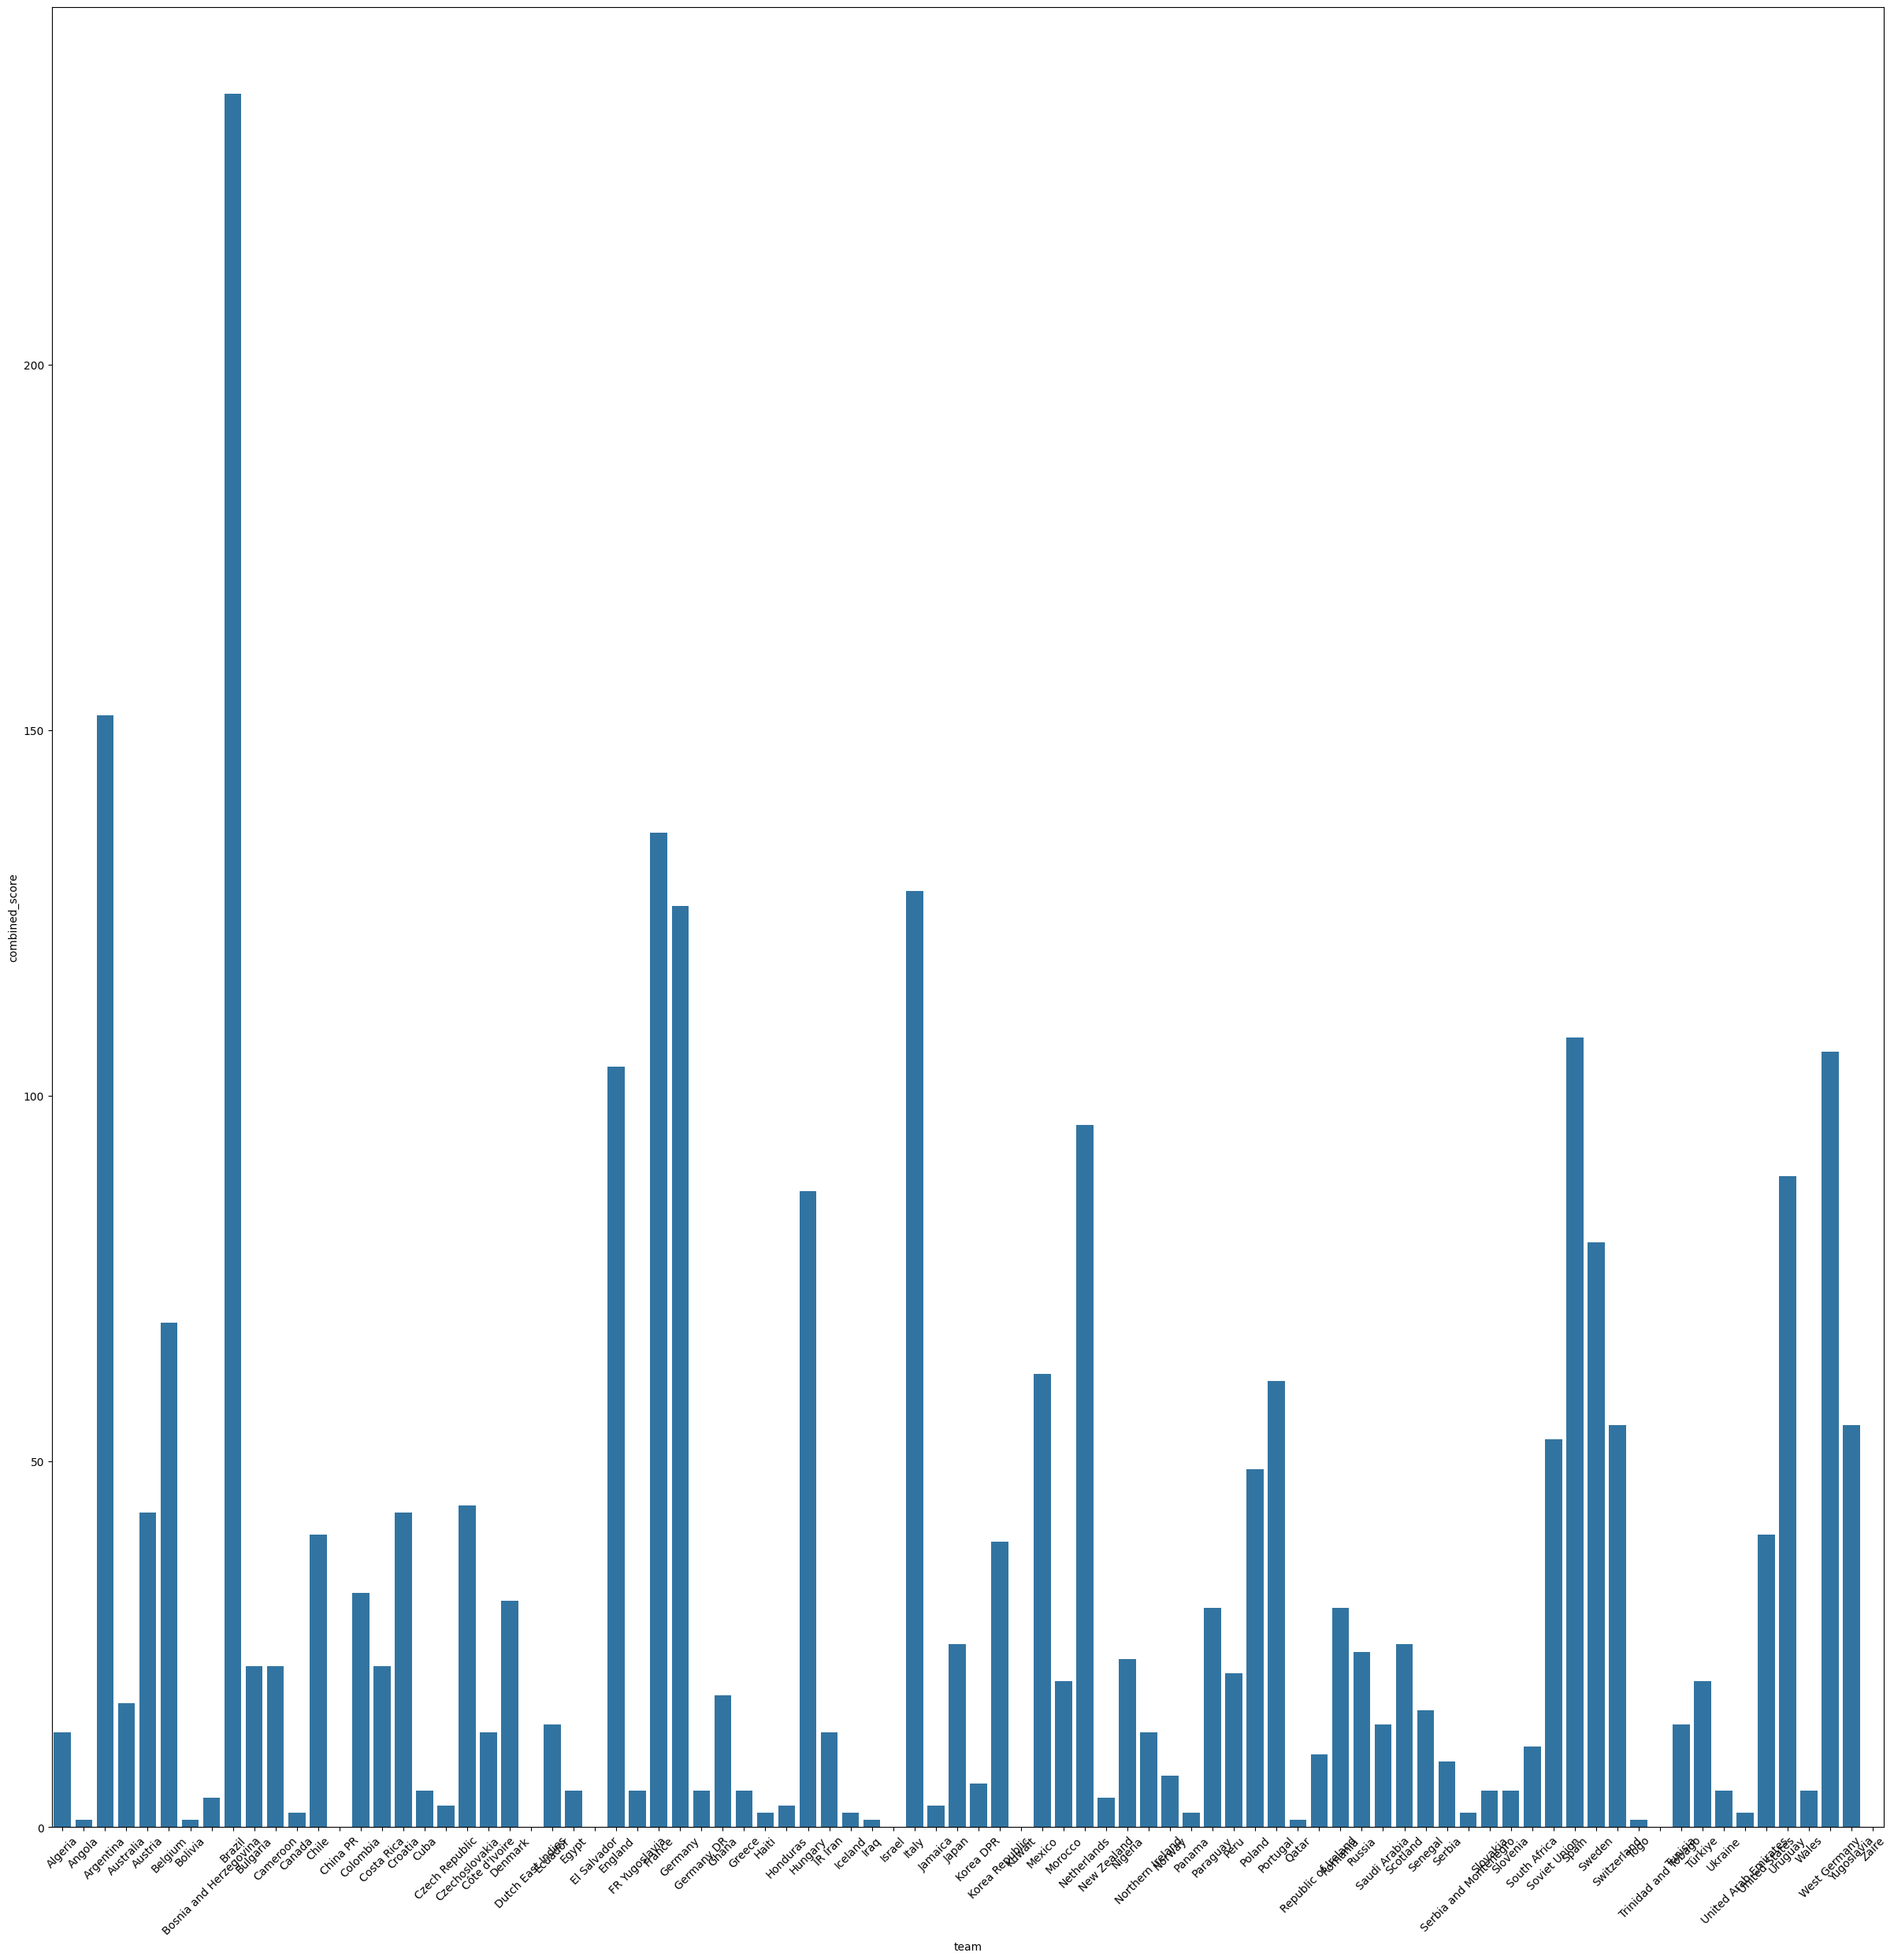

In [46]:
plt.figure(figsize=(30,30))
ax=sns.barplot(data=new_combined_df_score,x='team',y='combined_score')
ax.tick_params(axis='x', labelrotation=45)

In [47]:
# 2. Bar Plot: Show the number of yellow cards received by each team during the
# tournament. (fifa_matches dataset)
fifa_matches_df['away_yellow_card_long']

0      ['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...
1      ['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...
2                      ['27&rsquor;|1:0|Sofiane Boufal']
3      ['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...
4                             ['87&rsquor;|1:0|Vitinha']
                             ...                        
959                                                  NaN
960                                                  NaN
961                                                  NaN
962                                                  NaN
963                                                  NaN
Name: away_yellow_card_long, Length: 964, dtype: object

In [53]:
fifa_matches_df_expode_yellow_card=fifa_matches_df.explode('home_yellow_card_long')
fifa_matches_df_expode_yellow_card.head(2)

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...


In [82]:
new_fifa_matches_df=fifa_matches_df
# new_fifa_matches_df.dropna(subset = ['home_yellow_card_long', 'away_yellow_card_long'], inplace=True)
# new_fifa_matches_df

In [68]:
# new_fifa_matches_df['home_yellow_card_long'].apply(lambda x:type(x))

KeyError: 'home_yellow_card_long'

In [60]:
fifa_matches_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964 entries, 0 to 963
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   home_team                        964 non-null    object 
 1   away_team                        964 non-null    object 
 2   home_score                       964 non-null    int64  
 3   home_xg                          128 non-null    float64
 4   home_penalty                     35 non-null     float64
 5   away_score                       964 non-null    int64  
 6   away_xg                          128 non-null    float64
 7   away_penalty                     35 non-null     float64
 8   home_manager                     964 non-null    object 
 9   home_captain                     644 non-null    object 
 10  away_manager                     964 non-null    object 
 11  away_captain                     644 non-null    object 
 12  Attendance            

In [62]:
fifa_matches_df['home_yellow_card_long'].value_counts()

home_yellow_card_long
['1&rsquor;|0:0|Franz Beckenbauer']                                                                         2
['48&rsquor;|1:0|Alexi Lalas']                                                                              1
['33&rsquor;|0:0|Demetrio Albertini']                                                                       1
['3&rsquor;|0:0|Roy Keane', '29&rsquor;|0:0|Ray Houghton', '83&rsquor;|0:0|Gary Kelly']                     1
['57&rsquor;|3:1|Valeri Karpin', '87&rsquor;|6:1|Dmitri Khlestov', '90&rsquor;|6:1|Yuriy Nikiforov']        1
                                                                                                           ..
['26&rsquor;|1:0|James Milner', '61&rsquor;|1:1|Steven Gerrard']                                            1
['27&rsquor;|0:0|Kagisho Dikgacoi', '70&rsquor;|1:0|Tsepo Masilela']                                        1
['59&rsquor;|0:0|Mauricio Victorino', '65&rsquor;|0:0|Nicolás Lodeiro', '90+3&rsquor;|0:0|Diego Lu

In [100]:
new_fifa_matches_dfs=fifa_matches_df
new_fifa_matches_dfs.dropna(subset = ['home_yellow_card_long', 'away_yellow_card_long'], inplace=True)
new_fifa_matches_dfs['yellow_card_count'].apply(lambda x:len(x) if not str.isnumeric(str(x)) else x)

0      523
3      523
4      523
5      523
6      523
      ... 
767    523
771    523
774    523
782    523
792    523
Name: yellow_card_count, Length: 523, dtype: int64

In [97]:
len(new_fifa_matches_dfs['home_yellow_card_long'])

523

In [111]:
new_fifa_matches_dfs['home_yellow_card_count']=new_fifa_matches_dfs['home_yellow_card_long'].apply(lambda x:len(x.split(',')) if not str.isnumeric(str(x)) else x)
new_fifa_matches_dfs['away_yellow_card_count']=new_fifa_matches_dfs['away_yellow_card_long'].apply(lambda x:len(x.split(',')) if not str.isnumeric(str(x)) else x)


In [112]:
new_fifa_matches_dfs.head(2)

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,yellow_card_count,home_yellow_card_count,away_yellow_card_count
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...,523,5,3
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',...",523,2,2


In [113]:
new_fifa_matches_dfs.drop('yellow_card_count', axis=1)

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,home_yellow_card_count,away_yellow_card_count
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...,5,3
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',...",2,2
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...,2,1
5,England,France,1,2.4,NaN,2,0.9,NaN,Gareth Southgate,Harry Kane,...,NaN,NaN,NaN,NaN,['90&rsquor;|1:2|Harry Maguire'],"['43&rsquor;|0:1|Antoine Griezmann', '47&rsquo...",['79&rsquor;|1:2|Raheem Sterling|for Bukayo Sa...,['79&rsquor;|1:2|Kingsley Coman|for Ousmane De...,1,3
6,Croatia,Brazil,1,0.6,4.0,1,2.5,2.0,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,"['31&rsquor;|0:0|Marcelo Brozović', '117&rsquo...","['25&rsquor;|0:0|Danilo', '68&rsquor;|0:0|Case...",['72&rsquor;|0:0|Nikola Vlašić|for Mario Pašal...,"['56&rsquor;|0:0|Antony|for Raphinha', '64&rsq...",2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,West Germany,Soviet Union,2,NaN,NaN,1,NaN,NaN,Helmut Schoen,Uwe Seeler,...,NaN,Igor Chislenko · 44,NaN,NaN,['1&rsquor;|0:0|Franz Beckenbauer'],['1&rsquor;|0:0|Valery Voronin'],NaN,NaN,1,1
771,West Germany,Uruguay,4,NaN,NaN,0,NaN,NaN,Helmut Schoen,Uwe Seeler,...,NaN,Horacio Troche · 49|Héctor Silva · 54,NaN,NaN,['1&rsquor;|0:0|Wolfgang Weber'],['1&rsquor;|0:0|Héctor Silva'],NaN,NaN,1,1
774,West Germany,Spain,2,NaN,NaN,1,NaN,NaN,Helmut Schoen,Uwe Seeler,...,NaN,NaN,NaN,NaN,['1&rsquor;|0:0|Wolfgang Overath'],['1&rsquor;|0:0|Jesús Glaría'],NaN,NaN,1,1
782,Portugal,Bulgaria,3,NaN,NaN,0,NaN,NaN,Otto Gloria,Mário Coluna,...,NaN,NaN,NaN,NaN,['1&rsquor;|0:0|Eusébio'],['1&rsquor;|0:0|Dinko Dermendzhiev'],NaN,NaN,1,1


In [114]:
new_fifa_matches_dfs

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,yellow_card_count,home_yellow_card_count,away_yellow_card_count
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...,523,5,3
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',...",523,2,2
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...,523,2,1
5,England,France,1,2.4,NaN,2,0.9,NaN,Gareth Southgate,Harry Kane,...,NaN,NaN,NaN,['90&rsquor;|1:2|Harry Maguire'],"['43&rsquor;|0:1|Antoine Griezmann', '47&rsquo...",['79&rsquor;|1:2|Raheem Sterling|for Bukayo Sa...,['79&rsquor;|1:2|Kingsley Coman|for Ousmane De...,523,1,3
6,Croatia,Brazil,1,0.6,4.0,1,2.5,2.0,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,"['31&rsquor;|0:0|Marcelo Brozović', '117&rsquo...","['25&rsquor;|0:0|Danilo', '68&rsquor;|0:0|Case...",['72&rsquor;|0:0|Nikola Vlašić|for Mario Pašal...,"['56&rsquor;|0:0|Antony|for Raphinha', '64&rsq...",523,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,West Germany,Soviet Union,2,NaN,NaN,1,NaN,NaN,Helmut Schoen,Uwe Seeler,...,Igor Chislenko · 44,NaN,NaN,['1&rsquor;|0:0|Franz Beckenbauer'],['1&rsquor;|0:0|Valery Voronin'],NaN,NaN,523,1,1
771,West Germany,Uruguay,4,NaN,NaN,0,NaN,NaN,Helmut Schoen,Uwe Seeler,...,Horacio Troche · 49|Héctor Silva · 54,NaN,NaN,['1&rsquor;|0:0|Wolfgang Weber'],['1&rsquor;|0:0|Héctor Silva'],NaN,NaN,523,1,1
774,West Germany,Spain,2,NaN,NaN,1,NaN,NaN,Helmut Schoen,Uwe Seeler,...,NaN,NaN,NaN,['1&rsquor;|0:0|Wolfgang Overath'],['1&rsquor;|0:0|Jesús Glaría'],NaN,NaN,523,1,1
782,Portugal,Bulgaria,3,NaN,NaN,0,NaN,NaN,Otto Gloria,Mário Coluna,...,NaN,NaN,NaN,['1&rsquor;|0:0|Eusébio'],['1&rsquor;|0:0|Dinko Dermendzhiev'],NaN,NaN,523,1,1


In [132]:
pivot_table_yellow_cards_home=new_fifa_matches_dfs.pivot_table(index="home_team",values="home_yellow_card_count",aggfunc='sum')
pivot_table_yellow_cards_away=new_fifa_matches_dfs.pivot_table(index="away_team",values="away_yellow_card_count",aggfunc='sum')
pivot_table_yellow_cards_home.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, Algeria to Zaire
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   home_yellow_card_count  72 non-null     int64
dtypes: int64(1)
memory usage: 1.1+ KB


In [142]:
pivot_table_yellow_cards_away.reset_index()

,away_team,away_yellow_card_count
0,Algeria,8
1,Angola,7
2,Argentina,60
3,Australia,16
4,Austria,8
...,...,...
76,United States,32
77,Uruguay,46
78,Wales,2
79,West Germany,14


In [139]:
combined_df_yellow_cards=pd.DataFrame({"team":pivot_table_yellow_cards_away.index,"yellow_count":pivot_table_yellow_cards_away['away_yellow_card_count']+pivot_table_yellow_cards_home['home_yellow_card_count']})

combined_df_yellow_cards


ValueError: array length 81 does not match index length 84

In [143]:
pivot_table_yellow_cards_away['away_yellow_card_count']+pivot_table_yellow_cards_home['home_yellow_card_count']

Algeria          15.0
Angola           10.0
Argentina       134.0
Australia        32.0
Austria          18.0
                ...  
Uruguay          63.0
Wales             3.0
West Germany     37.0
Yugoslavia       15.0
Zaire             NaN
Length: 84, dtype: float64

In [148]:
new_fifa_matches_dfs['yellow_count']=new_fifa_matches_dfs['away_yellow_card_count']+new_fifa_matches_dfs['home_yellow_card_count']

In [149]:
new_fifa_matches_dfs.head()

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,yellow_card_count,home_yellow_card_count,away_yellow_card_count,yellow_count
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...,523,5,3,8
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',...",523,2,2,4
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...,523,2,1,3
5,England,France,1,2.4,NaN,2,0.9,NaN,Gareth Southgate,Harry Kane,...,NaN,NaN,['90&rsquor;|1:2|Harry Maguire'],"['43&rsquor;|0:1|Antoine Griezmann', '47&rsquo...",['79&rsquor;|1:2|Raheem Sterling|for Bukayo Sa...,['79&rsquor;|1:2|Kingsley Coman|for Ousmane De...,523,1,3,4
6,Croatia,Brazil,1,0.6,4.0,1,2.5,2.0,Zlatko Dalić,Luka Modrić,...,NaN,NaN,"['31&rsquor;|0:0|Marcelo Brozović', '117&rsquo...","['25&rsquor;|0:0|Danilo', '68&rsquor;|0:0|Case...",['72&rsquor;|0:0|Nikola Vlašić|for Mario Pašal...,"['56&rsquor;|0:0|Antony|for Raphinha', '64&rsq...",523,2,3,5


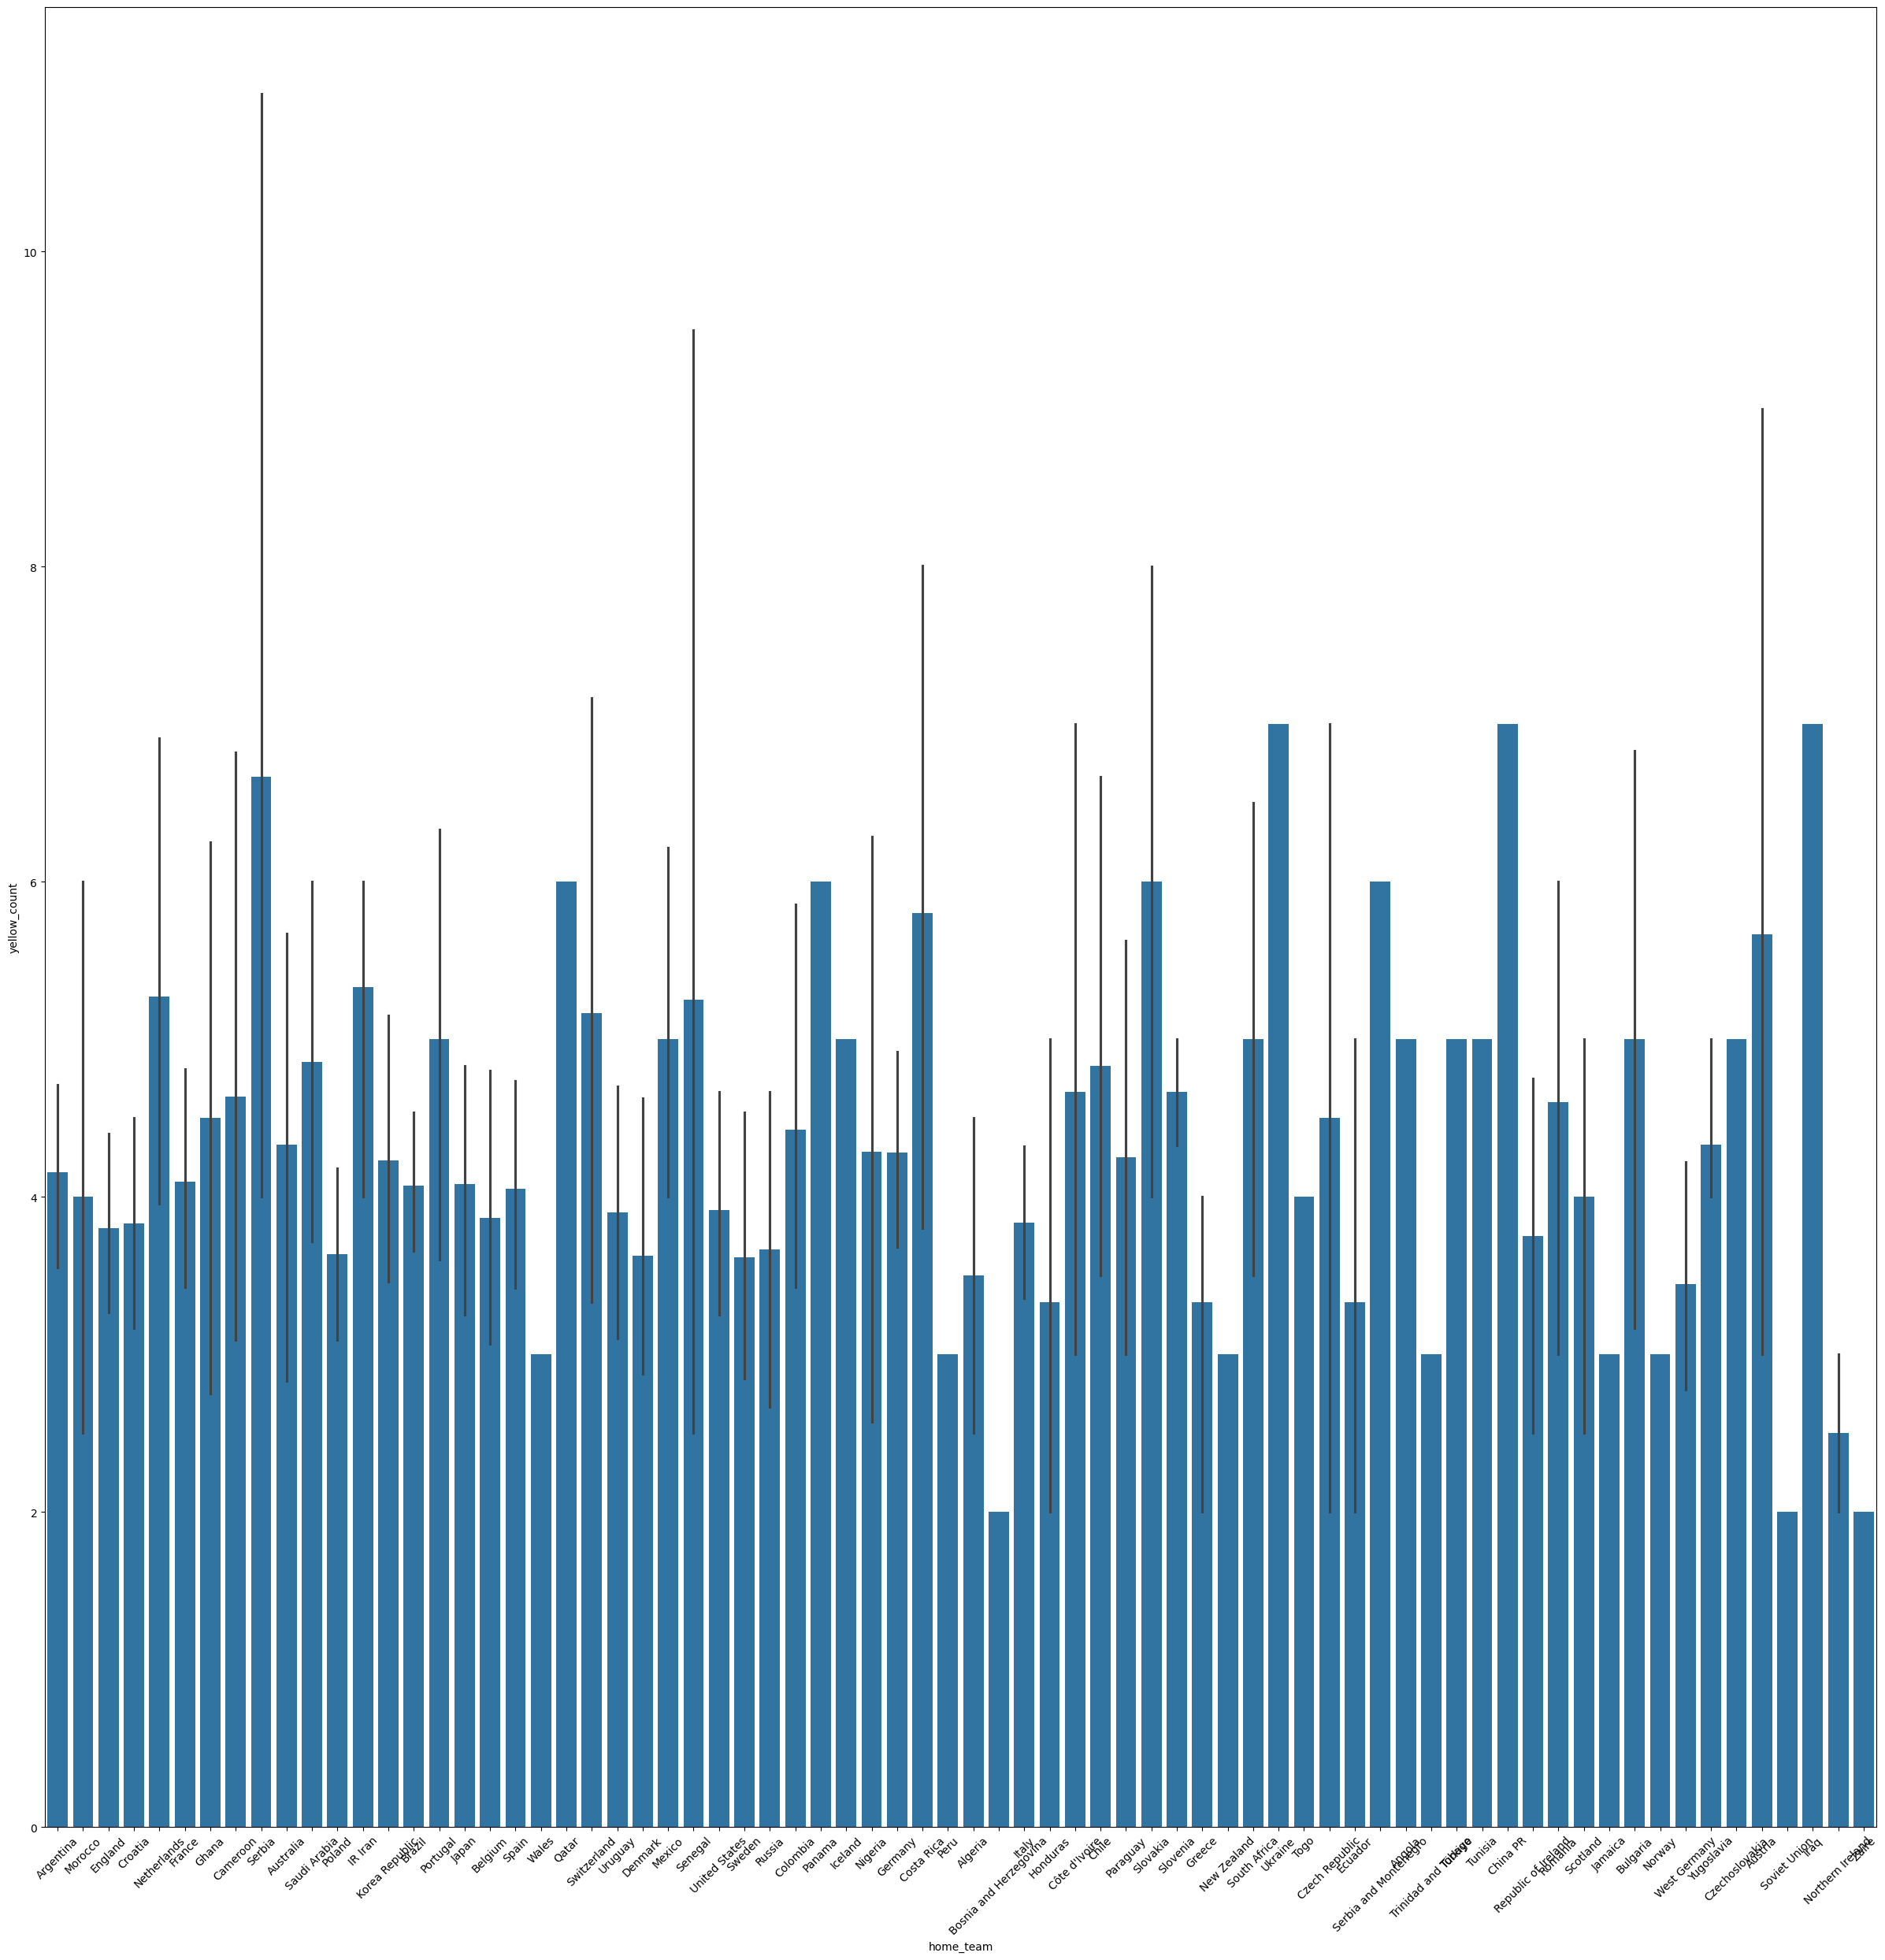

In [150]:
plt.figure(figsize=(30,30))
ax=sns.barplot(data=new_fifa_matches_dfs,x='home_team',y='yellow_count')
ax.tick_params(axis='x', labelrotation=45)

<Axes: xlabel='home_score', ylabel='away_score'>

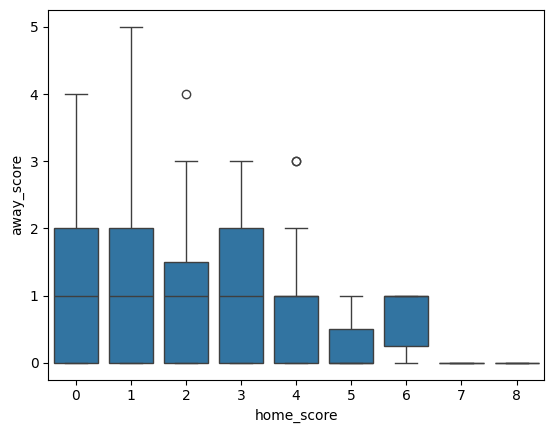

In [151]:
# 3. Box Plot: Show the distribution of scores (home_score and away_score) for all teams.
# (Use subplots of matplotlib or seaborn). (fifa_matches dataset)
sns.boxplot(x="home_score",
                y="away_score",
                data=new_fifa_matches_dfs)

In [161]:
# 4. Stacked Bar Plot: Display the number of wins, draws, and losses for all home teams.
# (fifa_matches dataset)
def check_status(row):
    if (row['home_score']==row['away_score']):
     return 'Draw'
    elif (row['home_score']>row['away_score']):
     return 'Win'
    else:
        return 'Loss'

new_fifa_matches_dfs['wining_status']=new_fifa_matches_dfs.apply(check_status, axis=1)
new_fifa_matches_dfs.drop(['draw','win_status',	'loss_status']	, axis=1)

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long,yellow_card_count,home_yellow_card_count,away_yellow_card_count,yellow_count,wining_status
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...,523,5,3,8,Draw
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',...",523,2,2,4,Win
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...,523,2,1,3,Win
5,England,France,1,2.4,NaN,2,0.9,NaN,Gareth Southgate,Harry Kane,...,NaN,['90&rsquor;|1:2|Harry Maguire'],"['43&rsquor;|0:1|Antoine Griezmann', '47&rsquo...",['79&rsquor;|1:2|Raheem Sterling|for Bukayo Sa...,['79&rsquor;|1:2|Kingsley Coman|for Ousmane De...,523,1,3,4,Loss
6,Croatia,Brazil,1,0.6,4.0,1,2.5,2.0,Zlatko Dalić,Luka Modrić,...,NaN,"['31&rsquor;|0:0|Marcelo Brozović', '117&rsquo...","['25&rsquor;|0:0|Danilo', '68&rsquor;|0:0|Case...",['72&rsquor;|0:0|Nikola Vlašić|for Mario Pašal...,"['56&rsquor;|0:0|Antony|for Raphinha', '64&rsq...",523,2,3,5,Draw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,West Germany,Soviet Union,2,NaN,NaN,1,NaN,NaN,Helmut Schoen,Uwe Seeler,...,NaN,['1&rsquor;|0:0|Franz Beckenbauer'],['1&rsquor;|0:0|Valery Voronin'],NaN,NaN,523,1,1,2,Win
771,West Germany,Uruguay,4,NaN,NaN,0,NaN,NaN,Helmut Schoen,Uwe Seeler,...,NaN,['1&rsquor;|0:0|Wolfgang Weber'],['1&rsquor;|0:0|Héctor Silva'],NaN,NaN,523,1,1,2,Win
774,West Germany,Spain,2,NaN,NaN,1,NaN,NaN,Helmut Schoen,Uwe Seeler,...,NaN,['1&rsquor;|0:0|Wolfgang Overath'],['1&rsquor;|0:0|Jesús Glaría'],NaN,NaN,523,1,1,2,Win
782,Portugal,Bulgaria,3,NaN,NaN,0,NaN,NaN,Otto Gloria,Mário Coluna,...,NaN,['1&rsquor;|0:0|Eusébio'],['1&rsquor;|0:0|Dinko Dermendzhiev'],NaN,NaN,523,1,1,2,Win


In [162]:
new_fifa_matches_dfs

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_substitute_in_long,away_substitute_in_long,yellow_card_count,home_yellow_card_count,away_yellow_card_count,yellow_count,draw,win_status,loss_status,wining_status
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...,523,5,3,8,1,0,0,Draw
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',...",523,2,2,4,0,1,0,Win
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...,523,2,1,3,0,1,0,Win
5,England,France,1,2.4,NaN,2,0.9,NaN,Gareth Southgate,Harry Kane,...,['79&rsquor;|1:2|Raheem Sterling|for Bukayo Sa...,['79&rsquor;|1:2|Kingsley Coman|for Ousmane De...,523,1,3,4,0,0,1,Loss
6,Croatia,Brazil,1,0.6,4.0,1,2.5,2.0,Zlatko Dalić,Luka Modrić,...,['72&rsquor;|0:0|Nikola Vlašić|for Mario Pašal...,"['56&rsquor;|0:0|Antony|for Raphinha', '64&rsq...",523,2,3,5,1,0,0,Draw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,West Germany,Soviet Union,2,NaN,NaN,1,NaN,NaN,Helmut Schoen,Uwe Seeler,...,NaN,NaN,523,1,1,2,0,1,0,Win
771,West Germany,Uruguay,4,NaN,NaN,0,NaN,NaN,Helmut Schoen,Uwe Seeler,...,NaN,NaN,523,1,1,2,0,1,0,Win
774,West Germany,Spain,2,NaN,NaN,1,NaN,NaN,Helmut Schoen,Uwe Seeler,...,NaN,NaN,523,1,1,2,0,1,0,Win
782,Portugal,Bulgaria,3,NaN,NaN,0,NaN,NaN,Otto Gloria,Mário Coluna,...,NaN,NaN,523,1,1,2,0,1,0,Win


In [183]:
# sns.catplot(data=new_fifa_matches_dfs,x="home_team",kind='bar',hue="wining_status",estimator='mean')
pivot_table_comaprisionsgroup=new_fifa_matches_dfs.groupby('wining_status')['home_team'].count()
pivot_table_comaprisionsgroup

wining_status
Draw    134
Loss    151
Win     238
Name: home_team, dtype: int64

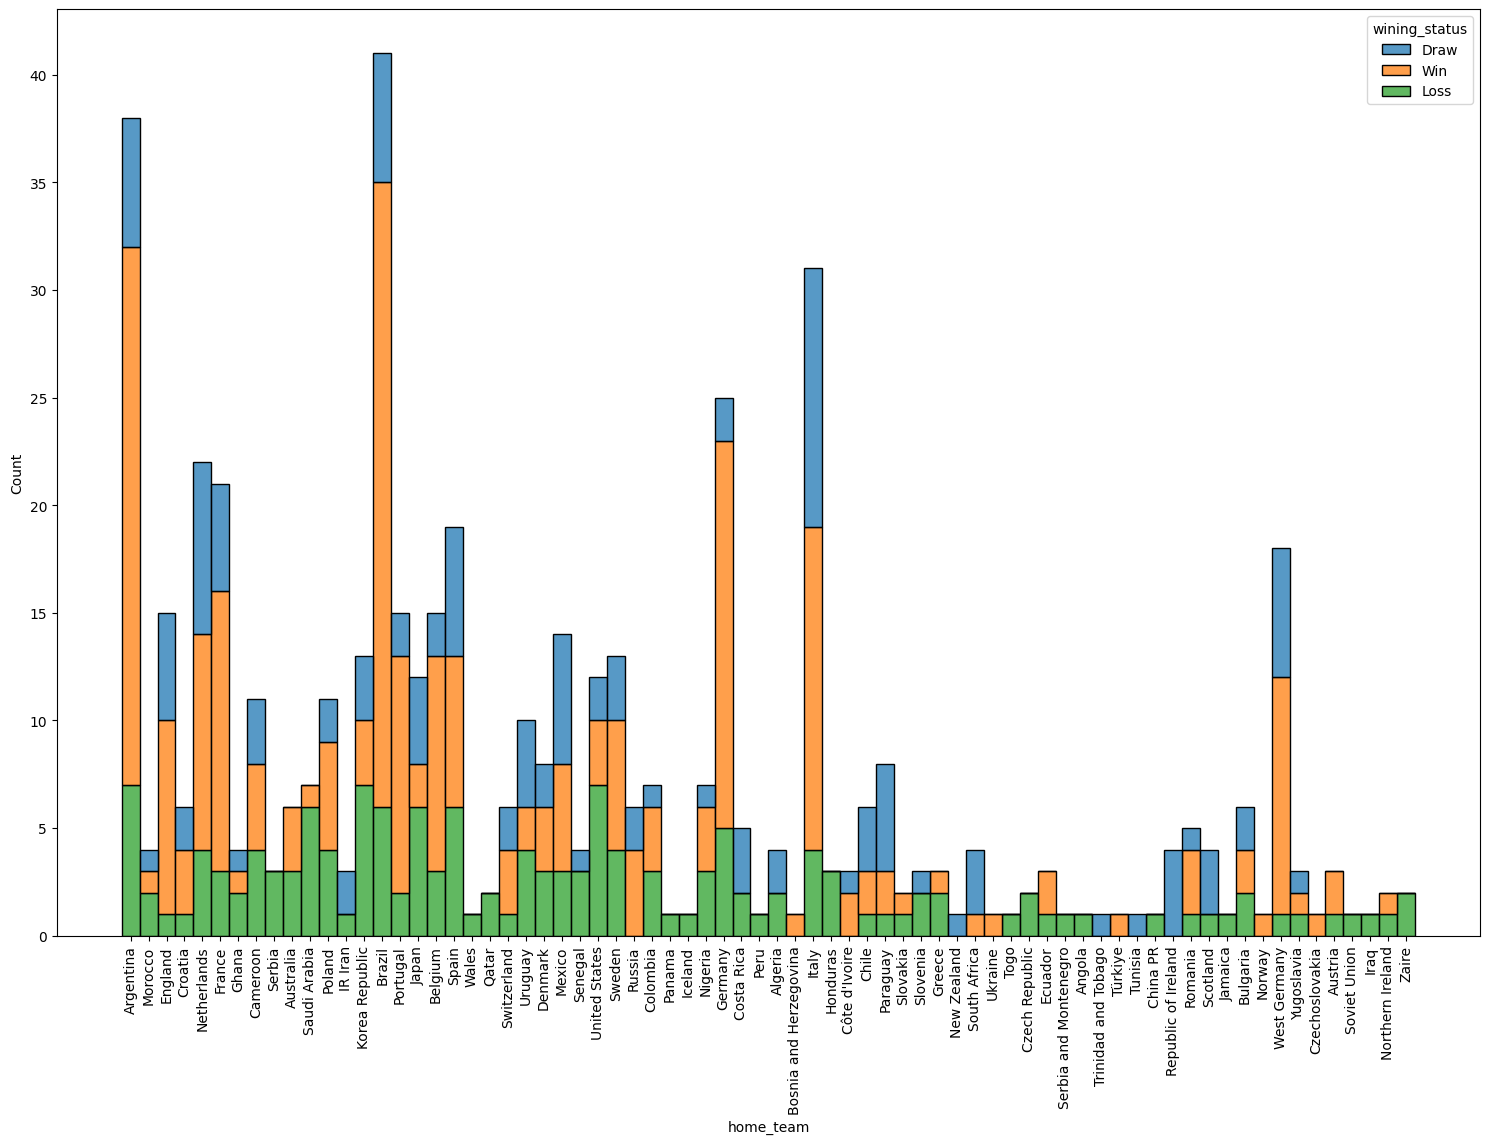

In [192]:
plt.figure(figsize=(15,10))
sns.histplot(data=new_fifa_matches_dfs,x="home_team",multiple='stack',hue='wining_status')
plt.tight_layout()
plt.xticks(rotation='vertical')
plt.show()

In [193]:
# 4. Stacked Bar Plot: Display the number of wins, draws, and losses for all home teams.
# (fifa_matches dataset)
latest_new_fifa_matches_dfs=new_fifa_matches_dfs[new_fifa_matches_dfs['wining_status'].isin(['Win','Loss'])]
latest_new_fifa_matches_dfs

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_substitute_in_long,away_substitute_in_long,yellow_card_count,home_yellow_card_count,away_yellow_card_count,yellow_count,draw,win_status,loss_status,wining_status
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',...",523,2,2,4,0,1,0,Win
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...,523,2,1,3,0,1,0,Win
5,England,France,1,2.4,NaN,2,0.9,NaN,Gareth Southgate,Harry Kane,...,['79&rsquor;|1:2|Raheem Sterling|for Bukayo Sa...,['79&rsquor;|1:2|Kingsley Coman|for Ousmane De...,523,1,3,4,0,0,1,Loss
12,France,Poland,3,1.4,NaN,1,1.7,NaN,Didier Deschamps,Hugo Lloris,...,['66&rsquor;|1:0|Youssouf Fofana|for Aurélien ...,['64&rsquor;|1:0|Arkadiusz Milik|for Sebastian...,523,1,2,3,0,1,0,Win
17,Ghana,Uruguay,0,1.6,NaN,2,1.8,NaN,Otto Addo,André Ayew,...,['46&rsquor;|0:2|Kamaldeen Sulemana|for Jordan...,['34&rsquor;|0:2|Matías Vecino|for Rodrigo Ben...,523,2,5,7,0,0,1,Loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,West Germany,Soviet Union,2,NaN,NaN,1,NaN,NaN,Helmut Schoen,Uwe Seeler,...,NaN,NaN,523,1,1,2,0,1,0,Win
771,West Germany,Uruguay,4,NaN,NaN,0,NaN,NaN,Helmut Schoen,Uwe Seeler,...,NaN,NaN,523,1,1,2,0,1,0,Win
774,West Germany,Spain,2,NaN,NaN,1,NaN,NaN,Helmut Schoen,Uwe Seeler,...,NaN,NaN,523,1,1,2,0,1,0,Win
782,Portugal,Bulgaria,3,NaN,NaN,0,NaN,NaN,Otto Gloria,Mário Coluna,...,NaN,NaN,523,1,1,2,0,1,0,Win


In [199]:
latest_new_fifa_matches_dfs_group=latest_new_fifa_matches_dfs.groupby('wining_status')['home_team'].count()	

In [206]:
latest_new_fifa_matches_dfs_group.index
new_df_campaigns=pd.DataFrame({'wining_status':latest_new_fifa_matches_dfs_group.index,'count':latest_new_fifa_matches_dfs_group.values})
new_df_campaigns

,wining_status,count
0,Loss,151
1,Win,238


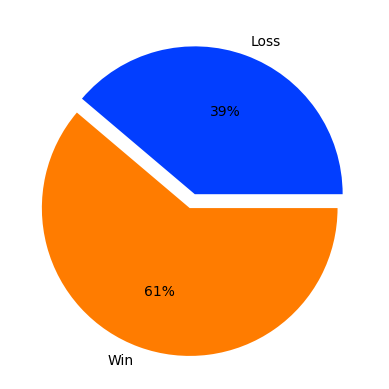

In [215]:
palette_color = sns.color_palette('bright') 
  
# plotting data on chart 
plt.pie(new_df_campaigns['count'], labels=new_df_campaigns['wining_status'], colors=palette_color, autopct='%.0f%%',explode=(0,0.1)) 
  
# displaying chart 
plt.show() 

In [246]:
len(columns)

9

/tmp/ipykernel_35219/3748971255.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.dropna(subset = columns, inplace=True)


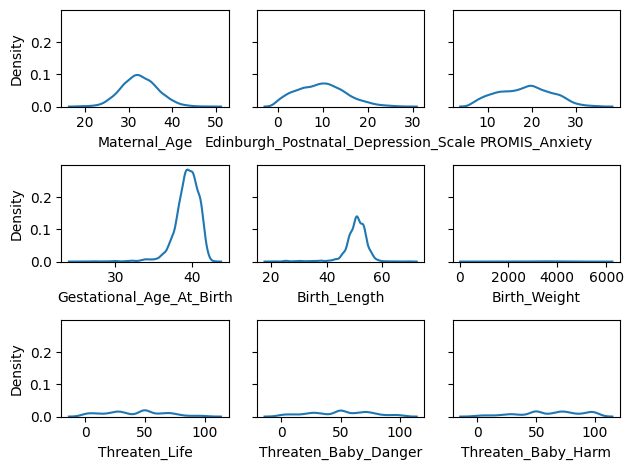

In [268]:
columns=['Maternal_Age','Edinburgh_Postnatal_Depression_Scale','PROMIS_Anxiety','Gestational_Age_At_Birth','Birth_Length','Birth_Weight','Threaten_Life','Threaten_Baby_Danger','Threaten_Baby_Harm']
a=covid_df[['Maternal_Age','Edinburgh_Postnatal_Depression_Scale','PROMIS_Anxiety','Gestational_Age_At_Birth','Birth_Length','Birth_Weight','Threaten_Life','Threaten_Baby_Danger','Threaten_Baby_Harm']]
a.dropna(subset = columns, inplace=True)
fi,ax=plt.subplots(nrows=3,ncols=3,sharey=True)
ax=ax.flatten()
k=0
for i in range(0,len(columns)):
    sns.kdeplot(a[columns[i]],ax=ax[i])
plt.tight_layout()
plt.show()
    


In [272]:

a


,Maternal_Age,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Birth_Length,Birth_Weight,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm
0,38.3,9.0,13.0,39.71,49.20,3431.0,2.0,3.0,27.0
3,28.8,9.0,20.0,38.57,41.00,2534.0,53.0,67.0,54.0
4,36.5,14.0,20.0,39.86,53.34,3714.0,23.0,32.0,71.0
8,33.1,1.0,7.0,40.86,55.88,4480.0,27.0,76.0,72.0
13,29.2,14.0,17.0,41.00,47.00,3084.0,68.0,69.0,81.0
...,...,...,...,...,...,...,...,...,...
10755,41.7,19.0,21.0,38.43,48.26,3700.0,94.0,94.0,91.0
10756,27.8,8.0,19.0,38.86,50.80,3573.0,45.0,82.0,86.0
10757,36.2,3.0,9.0,38.57,50.50,3119.0,70.0,32.0,75.0
10761,33.2,0.0,8.0,41.57,52.00,3629.0,0.0,13.0,17.0


<Axes: xlabel='Birth_Weight', ylabel='Birth_Length'>

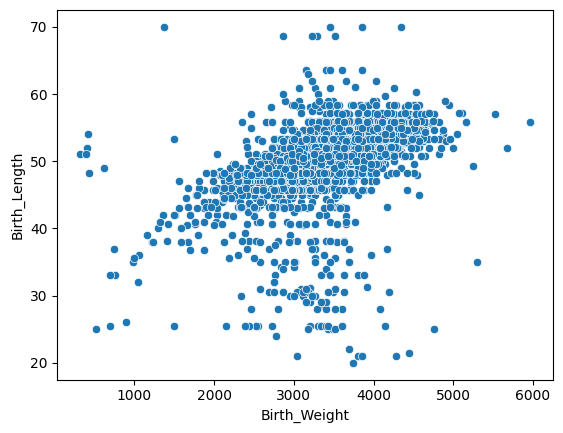

In [274]:
sns.scatterplot(data=a,x='Birth_Weight',y='Birth_Length')

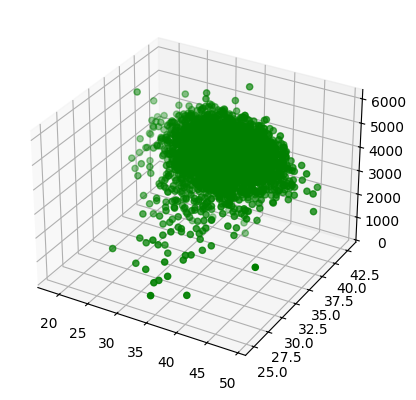

In [275]:
# . 3D Scatter Plot: Create a 3D scatter plot to visualize the relationship between
# Maternal_Age, Gestational_Age_At_Birth, and Birth_Weight. . (covid dataset)
ax = plt.axes(projection ="3d")
 

ax.scatter3D(a['Maternal_Age'], a['Gestational_Age_At_Birth'], a['Birth_Weight'], color = "green")

In [285]:
columns=['Birth_Length','Birth_Weight','Household_Income','Maternal_Age']
b=covid_df[['Birth_Length','Birth_Weight','Household_Income','Maternal_Age']]
b.dropna(subset = columns, inplace=True)
b

/tmp/ipykernel_35219/733132818.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b.dropna(subset = columns, inplace=True)


,Birth_Length,Birth_Weight,Household_Income,Maternal_Age
0,49.20,3431.0,"$200,000+",38.3
3,41.00,2534.0,"$100,000 -$124,999",28.8
4,53.34,3714.0,"$40,000-$69,999",36.5
8,55.88,4480.0,"$100,000 -$124,999",33.1
13,47.00,3084.0,"$70,000-$99,999",29.2
...,...,...,...,...
10755,48.26,3700.0,"$175,000- $199,999",41.7
10756,50.80,3573.0,"$150,000 - $174,999",27.8
10757,50.50,3119.0,"$150,000 - $174,999",36.2
10761,52.00,3629.0,"$125,000- $149,999",33.2


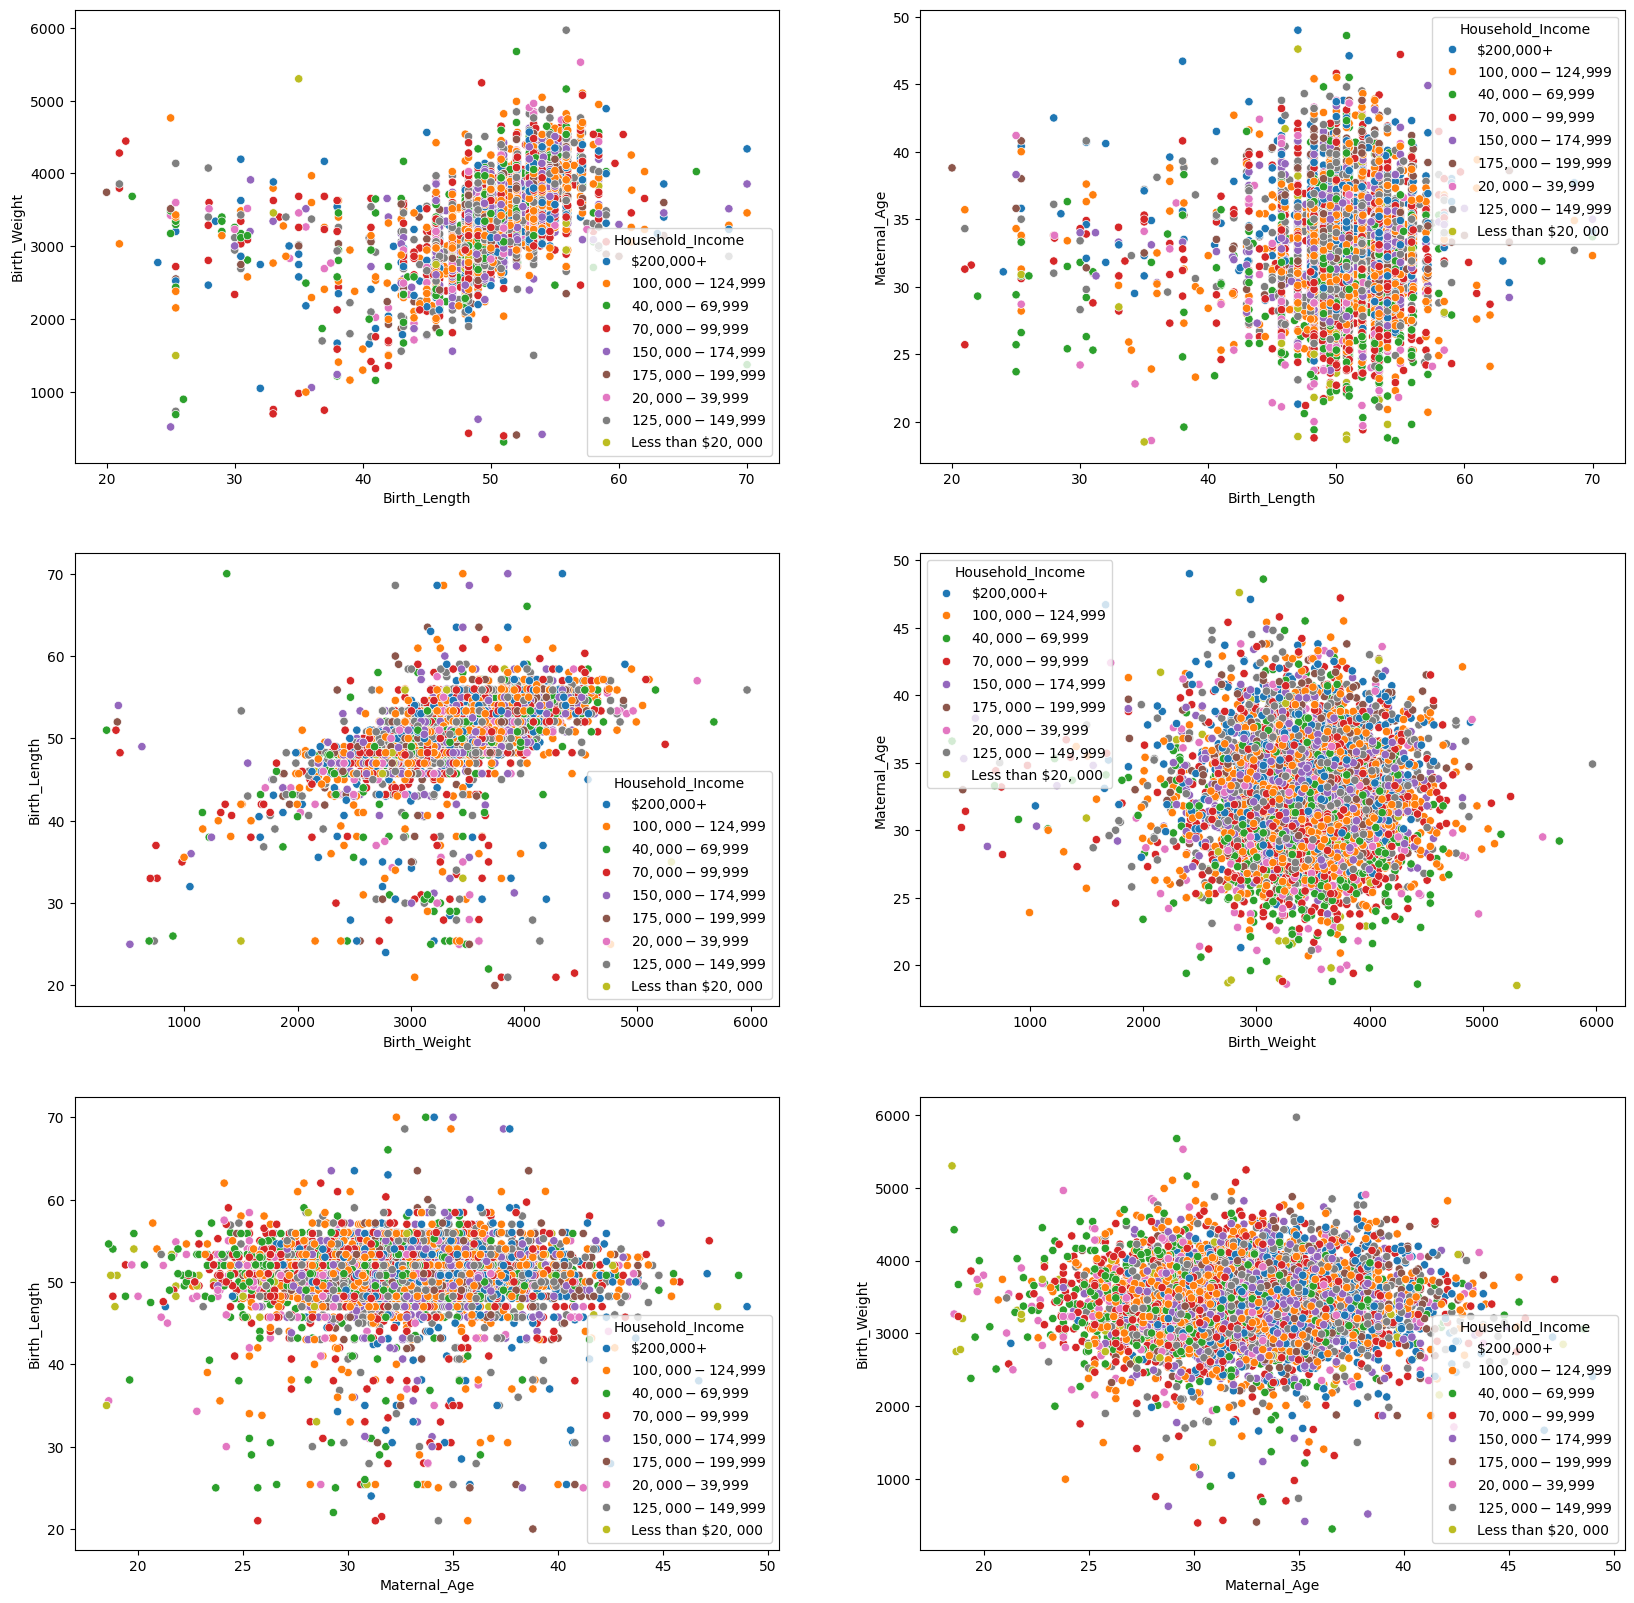

In [295]:
# 10. Subplots with Categorical Hue: Create subplots that compare Maternal_Age,
# Birth_Length, and Birth_Weight while coloring points based on Household_Income
# categories. (covid dataset)
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(20,20))
sns.scatterplot(data=b,x='Birth_Length',y='Birth_Weight',hue='Household_Income',ax=ax[0][0])
sns.scatterplot(data=b,x='Birth_Length',y='Maternal_Age',hue='Household_Income',ax=ax[0][1])
sns.scatterplot(data=b,x='Birth_Weight',y='Birth_Length',hue='Household_Income',ax=ax[1][0])
sns.scatterplot(data=b,x='Birth_Weight',y='Maternal_Age',hue='Household_Income',ax=ax[1][1])
sns.scatterplot(data=b,x='Maternal_Age',y='Birth_Length',hue='Household_Income',ax=ax[2][0])
sns.scatterplot(data=b,x='Maternal_Age',y='Birth_Weight',hue='Household_Income',ax=ax[2][1])

plt.show()
    

 


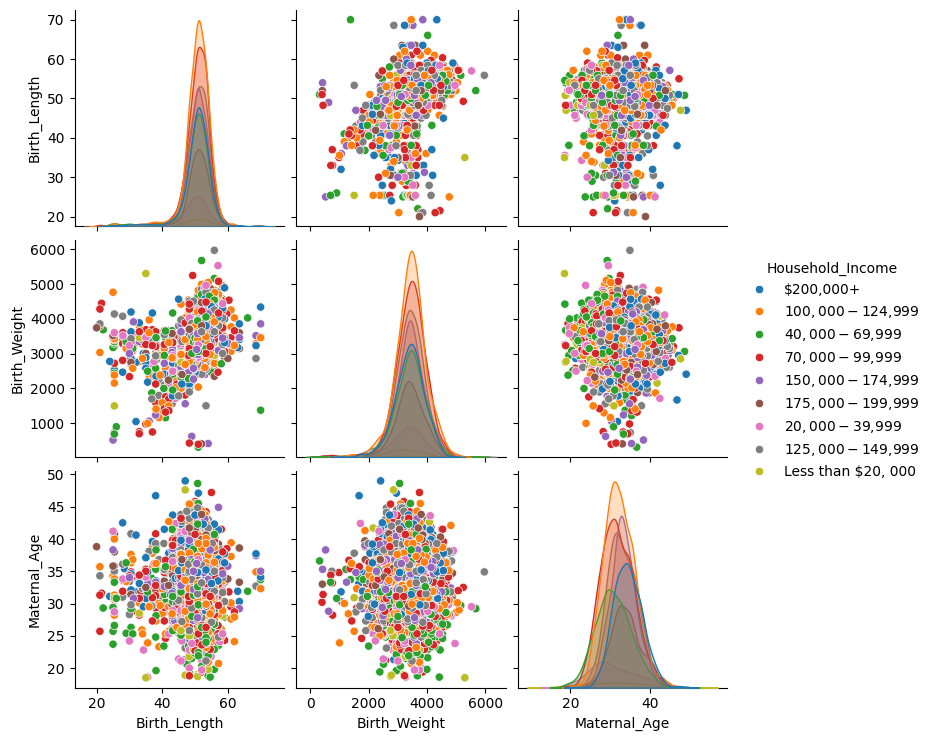

In [297]:
# 11. Create a pairplot of the dataset that includes Maternal_Age, Birth_Length, Birth_Weight,
# and Gestational_Age_At_Birth as the variables to compare. Add the hue parameter to
# color the plots based on Household_Income categories.
sns.pairplot(data=b,hue='Household_Income')

In [300]:
# 12. Use JointGrid to create a customized grid showing the relationship between Birth_Length
# and Gestational_Age_At_Birth (convert weeks into months one month=4.33 week). Add
# scatter plots to the joint axes and KDE plots to the marginal axes
c=covid_df[['Birth_Length','Gestational_Age_At_Birth']]
c.dropna(subset = ['Birth_Length','Gestational_Age_At_Birth'], inplace=True)
c['Gestational_Age_At_Birth_In_Months']=c['Gestational_Age_At_Birth'].apply(lambda x:x/4.33)
c

/tmp/ipykernel_35219/480575895.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c.dropna(subset = ['Birth_Length','Gestational_Age_At_Birth'], inplace=True)
/tmp/ipykernel_35219/480575895.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['Gestational_Age_At_Birth_In_Months']=c['Gestational_Age_At_Birth'].apply(lambda x:x/4.33)


,Birth_Length,Gestational_Age_At_Birth,Gestational_Age_At_Birth_In_Months
0,49.20,39.71,9.170901
3,41.00,38.57,8.907621
4,53.34,39.86,9.205543
7,50.17,38.00,8.775982
8,55.88,40.86,9.436490
...,...,...,...
10755,48.26,38.43,8.875289
10756,50.80,38.86,8.974596
10757,50.50,38.57,8.907621
10761,52.00,41.57,9.600462


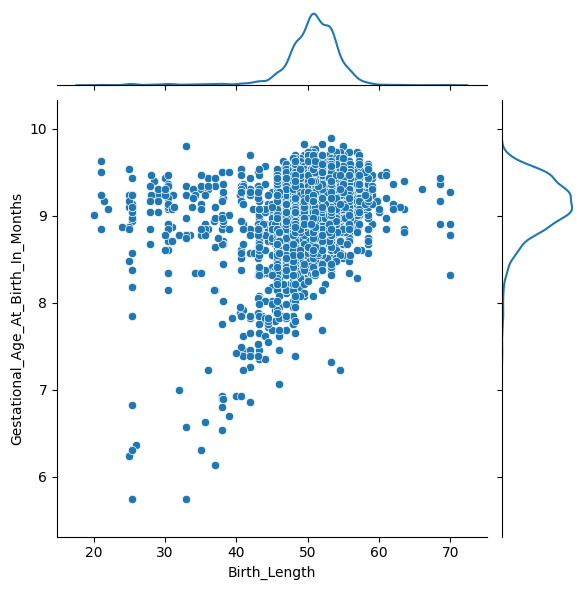

In [306]:
g=sns.JointGrid(data=c,x='Birth_Length', y='Gestational_Age_At_Birth_In_Months')
g.plot(sns.scatterplot,sns.kdeplot)

In [309]:
fifa_matches_df_for_heat_map=pd.read_csv('matches.csv')

In [310]:
fifa_matches_df_for_heat_map

,home_team,away_team,home_score,home_xg,home_penalty,away_score,away_xg,away_penalty,home_manager,home_captain,...,home_penalty_shootout_miss_long,away_penalty_shootout_miss_long,home_red_card,away_red_card,home_yellow_red_card,away_yellow_red_card,home_yellow_card_long,away_yellow_card_long,home_substitute_in_long,away_substitute_in_long
0,Argentina,France,3,3.3,4.0,3,2.2,2.0,Lionel Scaloni,Lionel Messi,...,NaN,"['3|1:1|Kingsley Coman', '5|2:1|Aurélien Tchou...",NaN,NaN,NaN,NaN,"['45+7&rsquor;|2:0|Enzo Fernández', '90+8&rsqu...","['55&rsquor;|2:0|Adrien Rabiot', '87&rsquor;|2...",['64&rsquor;|2:0|Marcos Acuña|for Ángel Di Mar...,['41&rsquor;|2:0|Randal Kolo Muani|for Ousmane...
1,Croatia,Morocco,2,0.7,NaN,1,1.2,NaN,Zlatko Dalić,Luka Modrić,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['69&rsquor;|2:1|Azzedine Ounahi', '84&rsquor;...",['61&rsquor;|2:1|Nikola Vlašić|for Andrej Kram...,['46&rsquor;|2:1|Ilias Chair|for Abdelhamid Sa...
2,France,Morocco,2,2.0,NaN,0,0.9,NaN,Didier Deschamps,Hugo Lloris,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['27&rsquor;|1:0|Sofiane Boufal'],['65&rsquor;|1:0|Marcus Thuram|for Olivier Gir...,['21&rsquor;|1:0|Selim Amallah|for Romain Saïs...
3,Argentina,Croatia,3,2.3,NaN,0,0.5,NaN,Lionel Scaloni,Lionel Messi,...,NaN,NaN,NaN,NaN,NaN,NaN,"['68&rsquor;|2:0|Cristian Romero', '71&rsquor;...","['32&rsquor;|0:0|Mateo Kovačić', '32&rsquor;|0...",['62&rsquor;|2:0|Lisandro Martínez|for Leandro...,"['46&rsquor;|2:0|Mislav Oršić|for Borna Sosa',..."
4,Morocco,Portugal,1,1.4,NaN,0,0.9,NaN,Hoalid Regragui,Romain Saïss,...,NaN,NaN,NaN,NaN,Walid Cheddira · 90+3,NaN,"['70&rsquor;|1:0|Achraf Dari', '90+1&rsquor;|1...",['87&rsquor;|1:0|Vitinha'],['57&rsquor;|1:0|Achraf Dari|for Romain Saïss'...,['51&rsquor;|1:0|João Cancelo|for Raphaël Guer...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
959,Argentina,France,1,NaN,NaN,0,NaN,NaN,Francisco Olazar,Manuel Ferreira,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
960,Yugoslavia,Brazil,2,NaN,NaN,1,NaN,NaN,Bosko Simonovic,Milutin Ivković,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
961,Romania,Peru,3,NaN,NaN,1,NaN,NaN,Octav Luchide,Emerich Vogl,...,NaN,NaN,NaN,Plácido Galindo · 70,NaN,NaN,NaN,NaN,NaN,NaN
962,United States,Belgium,3,NaN,NaN,0,NaN,NaN,Bob Millar,Tom Florie,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
